# Basic data analysis for royal office
Data comes from the website chcesiku.pl where one can observe the availibility of the bathroom in royal office. Status 1 stands for bathroom being occupied.

## Loads python libraries

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.plotly as py
import plotly.tools as tls
import numpy
import warnings
warnings.filterwarnings('ignore')
from seaborn import countplot
sns.set(rc={'figure.figsize':(14,10)})

## Loads all data from local csv
Date range equals to 2018-08-17 : 2018-12-25

In [9]:
data = pd.read_csv('chcesiku-dane-2018.csv',sep = ',')
data['ReportTime'] = data['ReportTime'].str.slice(0,19)
data['ReportTime'] = data['ReportTime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['StatusDuration'] = data['StatusDuration'].apply(lambda x: datetime.strptime(x,'%H:%M:%S'))
data.head()

,Id,ReportTime,Status,StatusDuration
0,1,2018-08-17 19:55:16,0,1900-01-01 00:00:00
1,2,2018-08-20 14:47:33,1,1900-01-01 00:00:00
2,3,2018-08-20 14:48:19,0,1900-01-01 00:00:46
3,4,2018-08-20 14:48:20,1,1900-01-01 00:00:01
4,5,2018-08-20 14:48:21,0,1900-01-01 00:00:00


## The results have to be shifted
When the status changes the time value is saved in the new row instead of the one that it describes, therefore it is necessery to move it up by one

In [10]:
data['StatusDuration'] = data['StatusDuration'].shift(-1)
data = data.dropna()

## Plots status duration and date time when bathroom is occupied

In [11]:
occupied_data = data[data['Status'] == 1]
a = occupied_data['StatusDuration'].dt.time

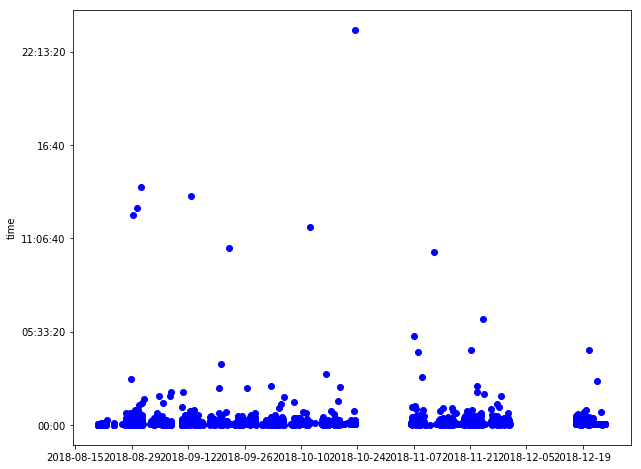

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(occupied_data['ReportTime'],a, 'bo')
plt.show()

In [13]:
occupied_data['hour'] = occupied_data['ReportTime']
occupied_data['hour'] = (occupied_data['hour'].dt.hour)

In [14]:
occupied_data.head()

,Id,ReportTime,Status,StatusDuration,hour
1,2,2018-08-20 14:47:33,1,1900-01-01 00:00:46,14
3,4,2018-08-20 14:48:20,1,1900-01-01 00:00:00,14
5,6,2018-08-20 16:51:34,1,1900-01-01 00:00:07,16
7,8,2018-08-20 16:56:23,1,1900-01-01 00:00:00,16
9,10,2018-08-20 16:56:24,1,1900-01-01 00:03:45,16


## Plots hour of the day versus time spent while occupied

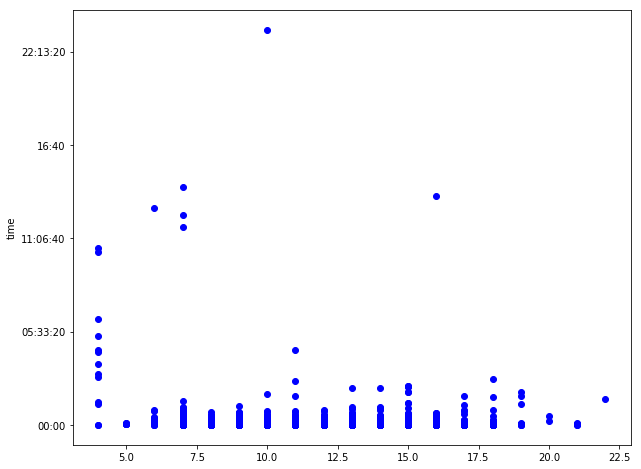

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(occupied_data['hour'],a, 'bo')
plt.show()

## Plots hour of the day versus count of all occupied states
During last 4 months

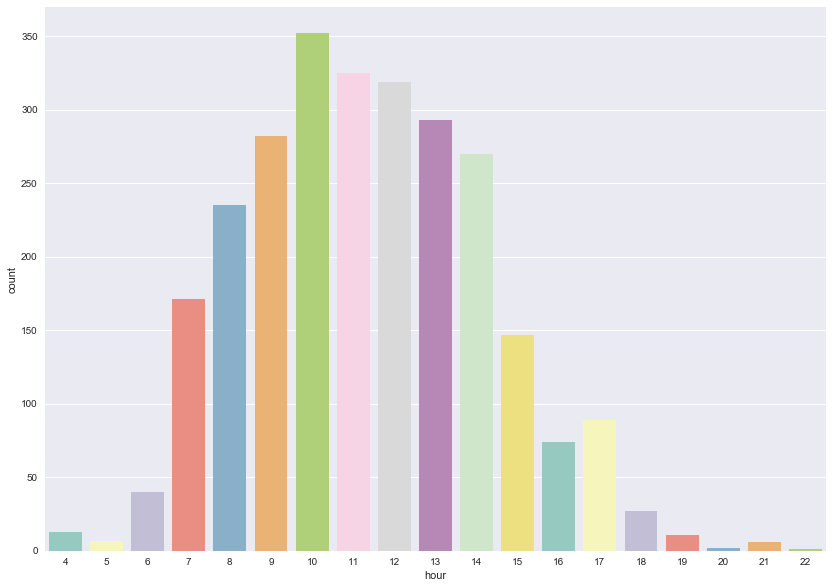

In [23]:
ax = sns.countplot(occupied_data['hour'], palette="Set3")

In [17]:
occupied_data = occupied_data.set_index('ReportTime')

In [18]:
amount_per_day = occupied_data.resample('D', how='count')

In [19]:
amount_per_day = amount_per_day.reset_index()

## Plots how many times the bathroom was occupied on given days
The range is approximately 4 months

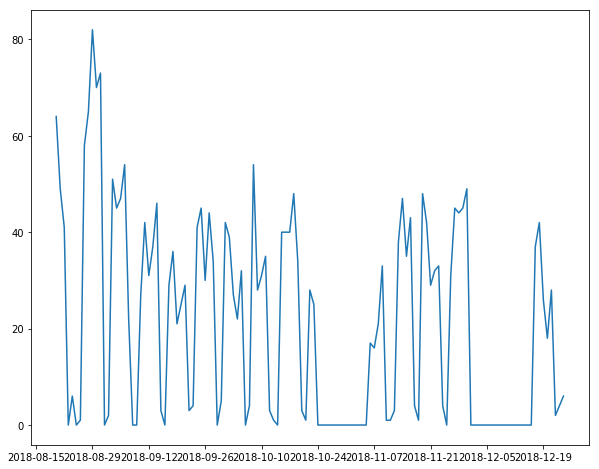

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(amount_per_day['ReportTime'],amount_per_day['Status'])
plt.show()